In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import pickle

In [9]:
from experiments import BasicSetup
from experiments import utilities as utils
from bayesinverse import Regression
from ggpymanager import GRAL

In [13]:
config_path = Path(
    "/home/rmaiwald/code/Experiments/experiments/basic_setup/config_conc.yaml"
)

exp = BasicSetup(config_path)
# basic_setup.run()


sensors 0.003049507737159729
emissions 1.534000277519226
transport 3.9220221489667892


In [14]:
exp.sensors.get_index()


(array([ 153,  459,  765, 1071,  153,  459,  765, 1071,  153,  459,  765,
        1071,  153,  459,  765, 1071,  153,  459,  765, 1071]),
 array([ 123,  123,  123,  123,  369,  369,  369,  369,  615,  615,  615,
         615,  861,  861,  861,  861, 1107, 1107, 1107, 1107]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [88]:
meteo_ids = exp.transport.get_meteo_ids()

In [122]:
meteo_ids

Int64Index([308, 318, 328, 328, 328, 328,  29, 243, 243, 407, 212, 412, 412,
            417, 609, 238, 417, 283, 293, 489,  96, 489, 313, 122],
           dtype='int64')

In [87]:
con_xr = xr.DataArray(
    data=np.zeros((GRAL.nx, GRAL.ny, 5, 24)),
    coords={
        "x": GRAL.xmin + GRAL.dx * np.arange(GRAL.nx),
        "y": GRAL.ymin + GRAL.dy * np.arange(GRAL.ny),
        "z": [2, 5, 10, 20, 30],
        "t": np.arange(24)
    }
)

In [ ]:
emissions_mask = exp.emissions.mask


In [114]:
for i, meteo_id in enumerate(meteo_ids):
    print(i)
    con_dict = exp.transport.reader.get_concentration(meteo_id)
    for j, height in enumerate(con_xr.coords["z"].values):
        for key, val in con_dict.items():
            if j == int(key[0]) - 1:
                source_group = int(key[1:])
                # Source group id in emissions
                if source_group < len(emissions_mask):
                    if emissions_mask.sel(source_group=source_group):
                        # Array not empty
                        if val.size > 1:
                            con_xr[:, :, j, i] += val * exp.emissions.truth.sel(
                                source_group=source_group, time_state=i
                            ).values

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [117]:
co2_xr = utils.convert_to_ppm(con_xr)
co2_xr = co2_xr.transpose("y", "x", ...)

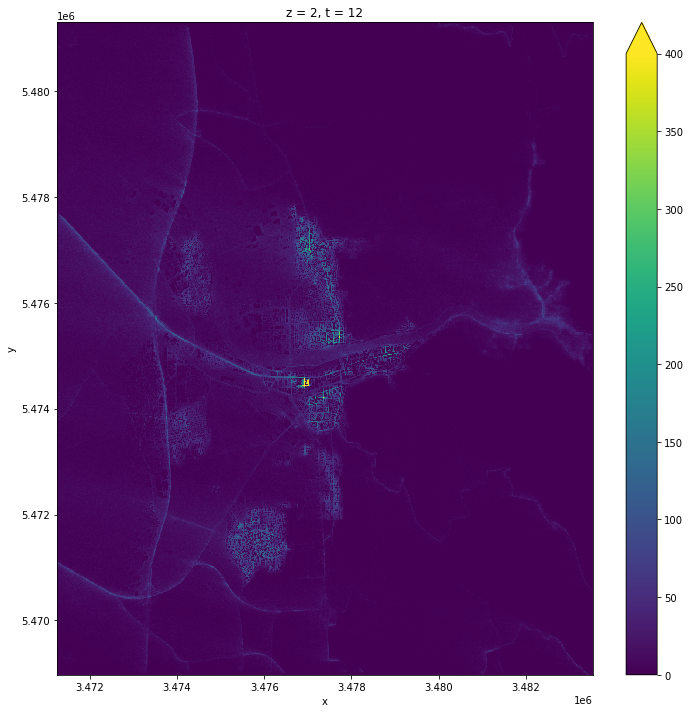

In [124]:
co2_xr.isel(z=0, t=12).plot(figsize=(12, 12), vmax=400)

In [123]:
co2_xr.to_netcdf("/home/rmaiwald/results/misc/diurnal_concentration.nc")